In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
%cd '/content/drive/My Drive/SBU/Sem 3 - Fall 20/Data Science Fundamentals/DSF Final Project'

/content/drive/My Drive/SBU/Sem 3 - Fall 20/Data Science Fundamentals/DSF Final Project


In [135]:
def getCorrelationPlot(df, fig_size=(12,8)):
    fig, ax = plt.subplots(figsize=fig_size)
    sns.heatmap(df.corr(),ax=ax, vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot = True, annot_kws={'fontsize':12})

# making a function to plot bar charts when needed quickly
# this should also take care of x and y axis with labels on x axis
def plotBarChart(df, title = "", xlab = "",ylab = "",xlabs_custom=[],rotation=45):
    sns.set(font_scale=1.4)
    df.plot.bar(figsize=(26, 6), linewidth=2)
    plt.xlabel(xlab, labelpad=8)

    plt.ylabel(ylab, labelpad=8)
    plt.title(title, y=1.02, fontsize=22)

    xi = range(len(xlabs_custom))
    if len(xi)>0:
        plt.xticks(xi, xlabs_custom)
        plt.xticks(rotation=rotation)

def plotLineChart(df, title = "", xlab = "",ylab = "",xlabs_custom=[]):
    sns.set(font_scale=1.4)
    df.plot(figsize=(26, 8), linewidth=2)
    plt.xlabel(xlab, labelpad=8)
    plt.ylabel(ylab, labelpad=8)
    plt.title(title, y=1.02, fontsize=22)

    xi = range(len(xlabs_custom))
    if len(xi)>0:
        plt.xticks(xi, xlabs_custom)
        plt.xticks(rotation=90)

def plotSctterChart(df, x, y):
    df_main.plot.scatter(x, y,figsize=(12,8))

# Data Cleaning and Correlation

In [136]:
df_main = pd.read_csv('data/prelim_data.csv')

In [137]:
zero_cols = ['Ladder Score Rank','Social Support Rank']
nan_cols = ['Seat held in Parliament by Women','Female Enrollment in secondary education (%)','Literacy rate, adult (% ages 15 and older)','Natural resource depletion (% of GNI)', 'Life expectancy at birth',
       'Gross domestic product (GDP) per capita (2011 PPP $)','Inequality in income (%)', 'Suicide rate, female (per 100,000 people)','Suicide rate, male (per 100,000 people)','Mortality Rate (Per 100,000 live births)',
       'Adolescent birth rate (per 1000)']
    
for col in zero_cols:
    df_main[col] = df_main[col].fillna(0)

for col in nan_cols:
    df_main[col] = df_main[col].fillna(df_main[col].mean())

In [138]:
df_main = df_main[df_main['Ladder Score Rank']>0]
df_main = df_main[df_main['Social Support Rank']>0]
df_main['toal_suicides'] = df_main['Suicide rate, female (per 100,000 people)'] + df_main['Suicide rate, male (per 100,000 people)']
df_main.sample(5)

,Country,Ladder Score Rank,Social Support Rank,Seat held in Parliament by Women,Female Enrollment in secondary education (%),"Literacy rate, adult (% ages 15 and older)",Natural resource depletion (% of GNI),Life expectancy at birth,Gross domestic product (GDP) per capita (2011 PPP $),Inequality in income (%),"Suicide rate, female (per 100,000 people)","Suicide rate, male (per 100,000 people)","Mortality Rate (Per 100,000 live births)",Adolescent birth rate (per 1000),toal_suicides
83,Cyprus,42.0,84.0,17.857143,0.00000,85.176923,0.0,80.8,33048.0,14.300000,1.9,7.2,6.0,4.4,9.1
11,Bulgaria,83.0,12.0,23.750000,0.00000,85.176923,0.7,74.9,19321.0,23.900000,3.2,13.1,10.0,38.2,16.3
96,Armenia,101.0,97.0,18.095238,47.26682,85.176923,2.9,74.9,9178.0,17.400000,2.0,10.1,26.0,21.2,12.1
130,Afghanistan,133.0,131.0,0.000000,35.12363,85.176923,0.3,64.5,1735.0,23.258599,2.1,10.6,638.0,62.0,12.7
37,Belarus,68.0,38.0,34.545455,48.29377,85.176923,0.6,74.6,17742.0,10.800000,6.2,39.3,2.0,14.2,45.5


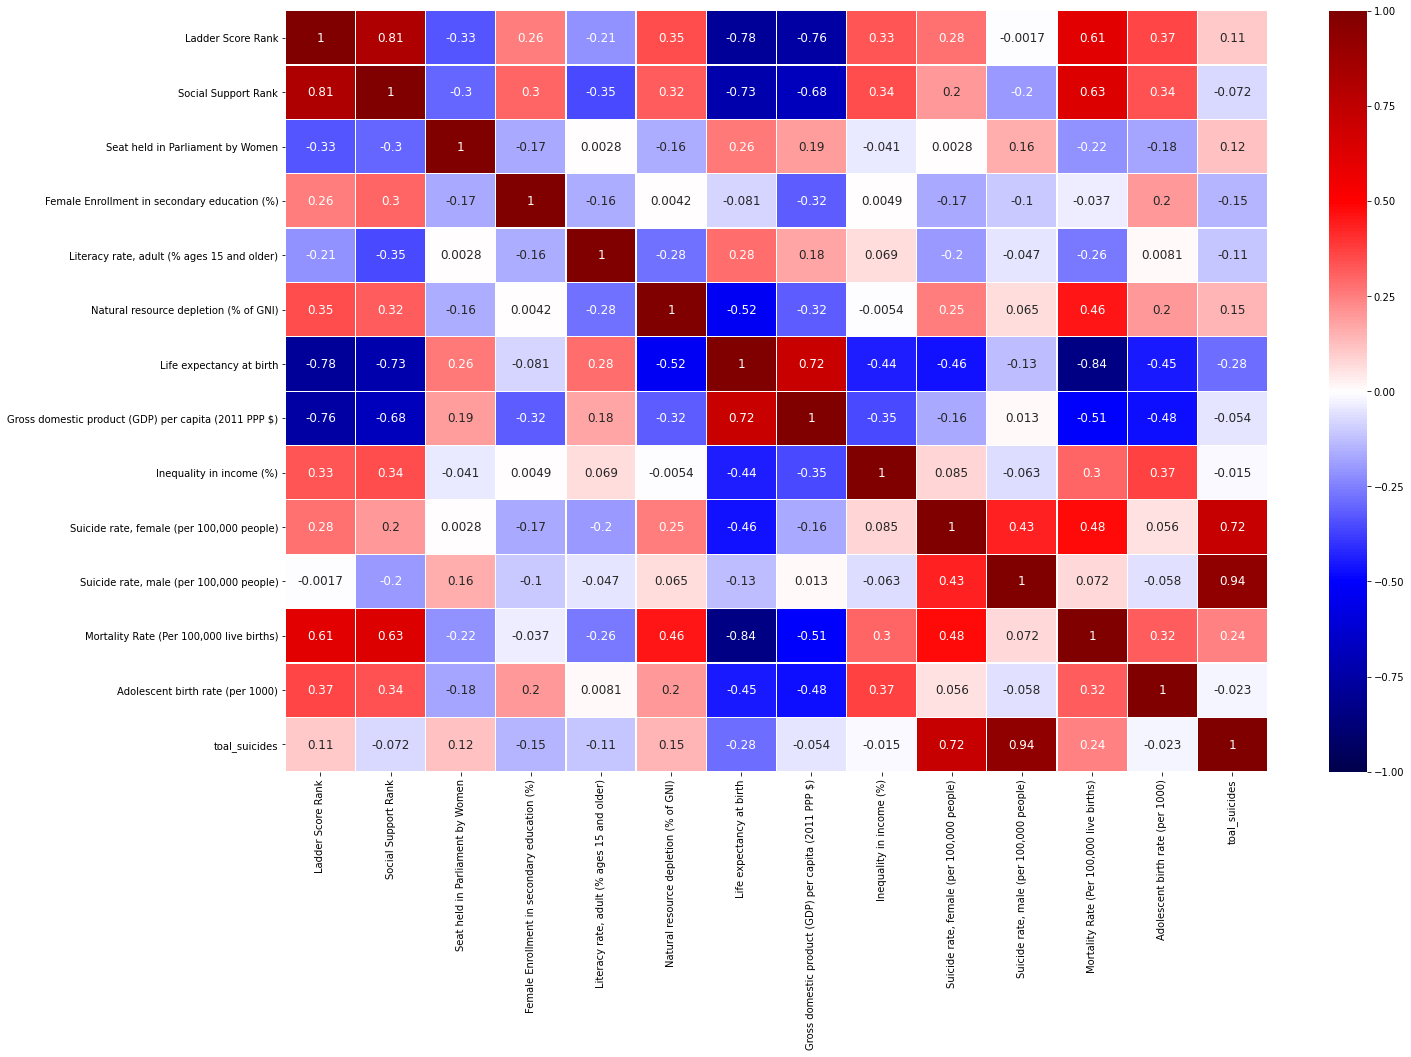

In [139]:
getCorrelationPlot(df_main, fig_size=(22,14))

# Useful Plots

In [140]:
df_main.columns

Index(['Country', 'Ladder Score Rank', 'Social Support Rank',
       'Seat held in Parliament by Women',
       'Female Enrollment in secondary education (%)',
       'Literacy rate, adult (% ages 15 and older)',
       'Natural resource depletion (% of GNI)', 'Life expectancy at birth',
       'Gross domestic product (GDP) per capita (2011 PPP $)',
       'Inequality in income (%)', 'Suicide rate, female (per 100,000 people)',
       'Suicide rate, male (per 100,000 people)',
       'Mortality Rate (Per 100,000 live births)',
       'Adolescent birth rate (per 1000)', 'toal_suicides'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


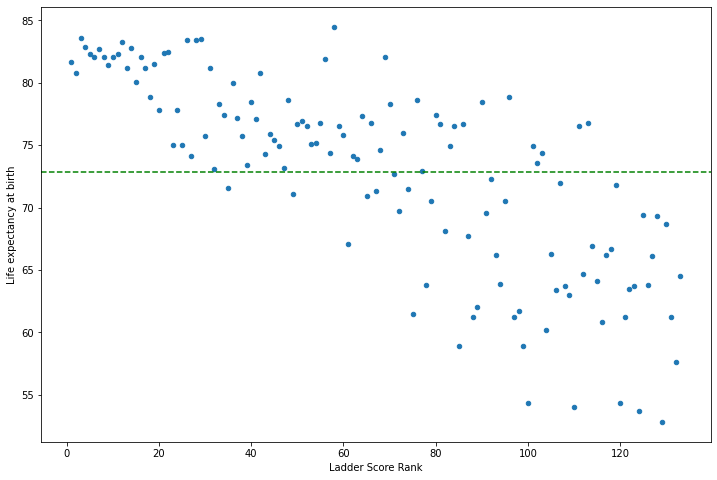

In [141]:
plotSctterChart(df_main,'Ladder Score Rank','Life expectancy at birth')
plt.axes().axhline(df_main['Life expectancy at birth'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


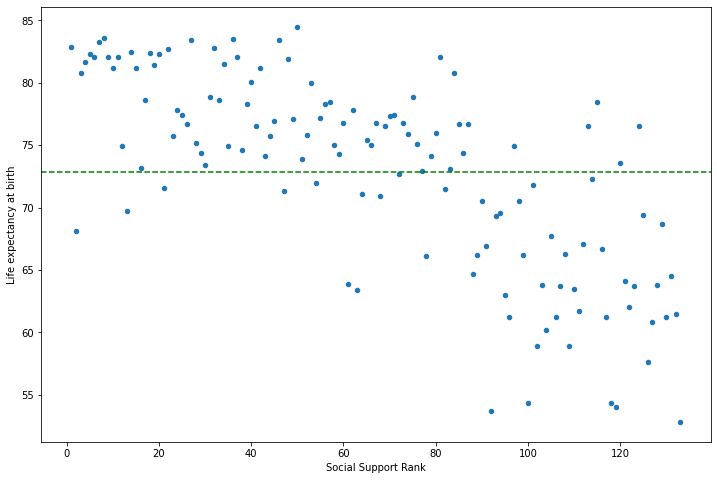

In [142]:
plotSctterChart(df_main,'Social Support Rank','Life expectancy at birth')
plt.axes().axhline(df_main['Life expectancy at birth'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


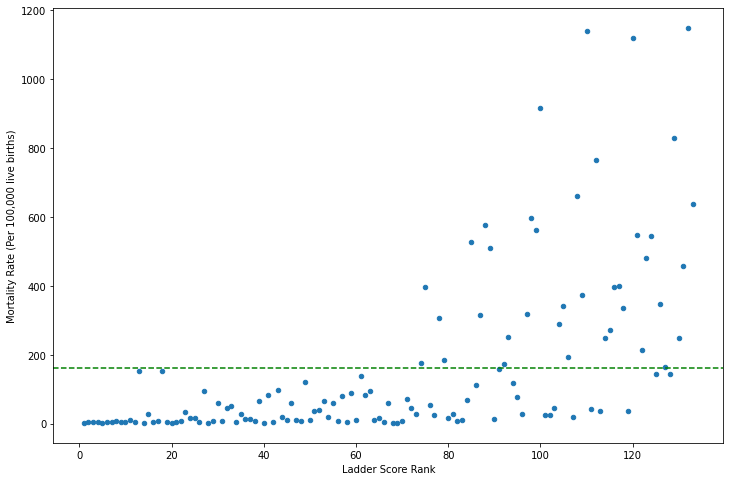

In [143]:
plotSctterChart(df_main,'Ladder Score Rank','Mortality Rate (Per 100,000 live births)')
plt.axes().axhline(df_main['Mortality Rate (Per 100,000 live births)'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


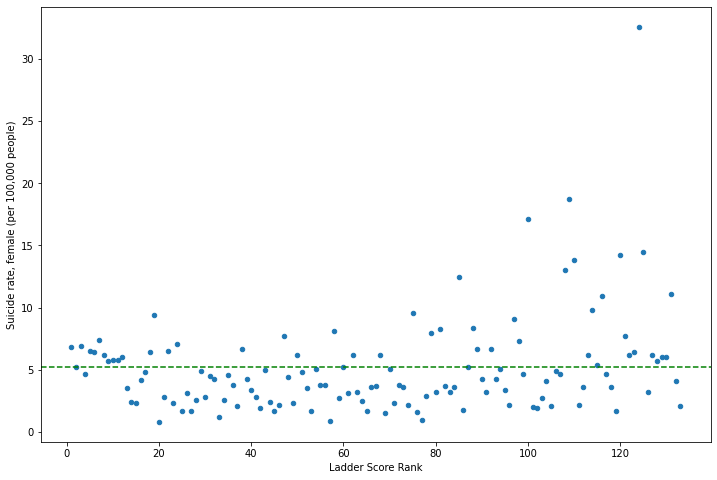

In [144]:
plotSctterChart(df_main,'Ladder Score Rank','Suicide rate, female (per 100,000 people)')
plt.axes().axhline(df_main['Suicide rate, female (per 100,000 people)'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


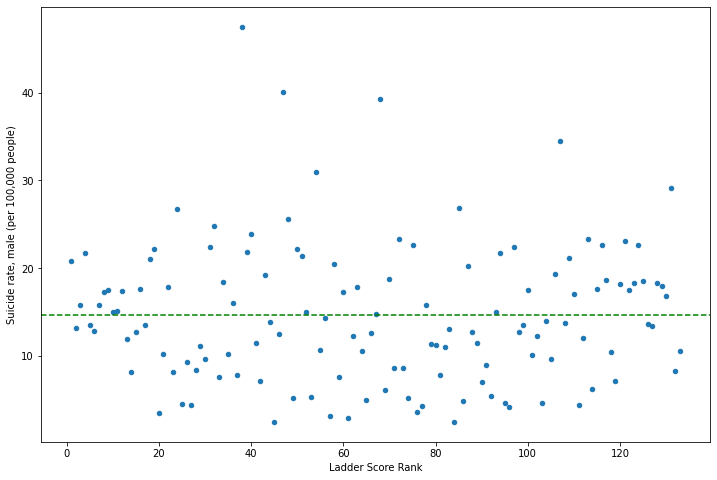

In [145]:
plotSctterChart(df_main,'Ladder Score Rank','Suicide rate, male (per 100,000 people)')
plt.axes().axhline(df_main['Suicide rate, male (per 100,000 people)'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


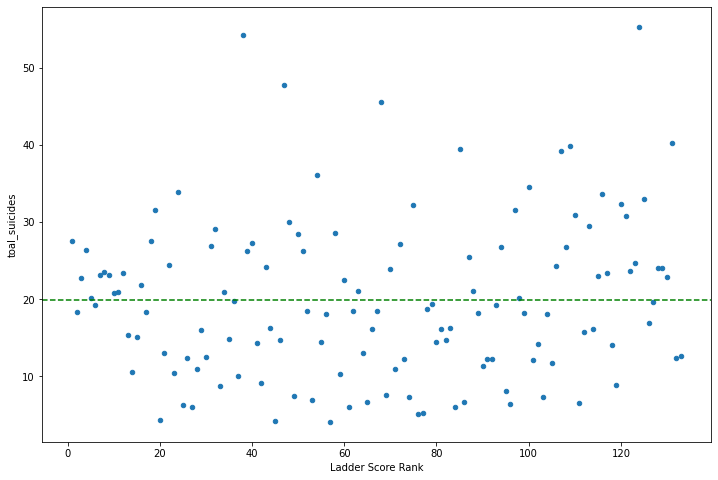

In [146]:
plotSctterChart(df_main,'Ladder Score Rank','toal_suicides')
plt.axes().axhline(df_main['toal_suicides'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


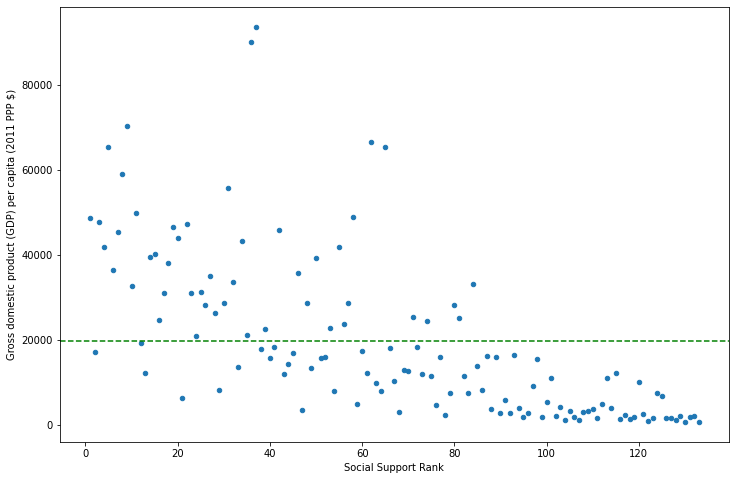

In [147]:
plotSctterChart(df_main,'Social Support Rank','Gross domestic product (GDP) per capita (2011 PPP $)')
plt.axes().axhline(df_main['Gross domestic product (GDP) per capita (2011 PPP $)'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


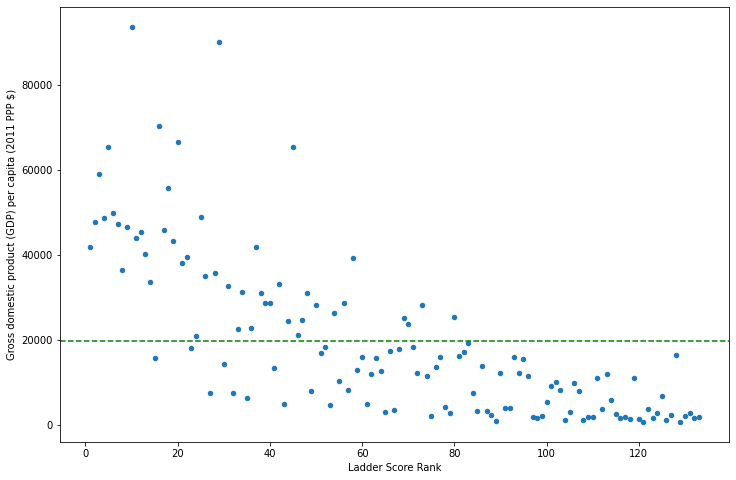

In [148]:
plotSctterChart(df_main,'Ladder Score Rank','Gross domestic product (GDP) per capita (2011 PPP $)')
plt.axes().axhline(df_main['Gross domestic product (GDP) per capita (2011 PPP $)'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


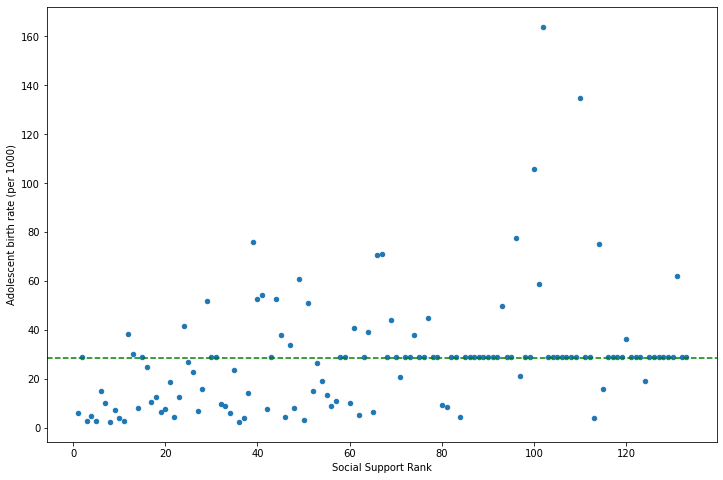

In [149]:
plotSctterChart(df_main,'Social Support Rank','Adolescent birth rate (per 1000)')
plt.axes().axhline(df_main['Adolescent birth rate (per 1000)'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


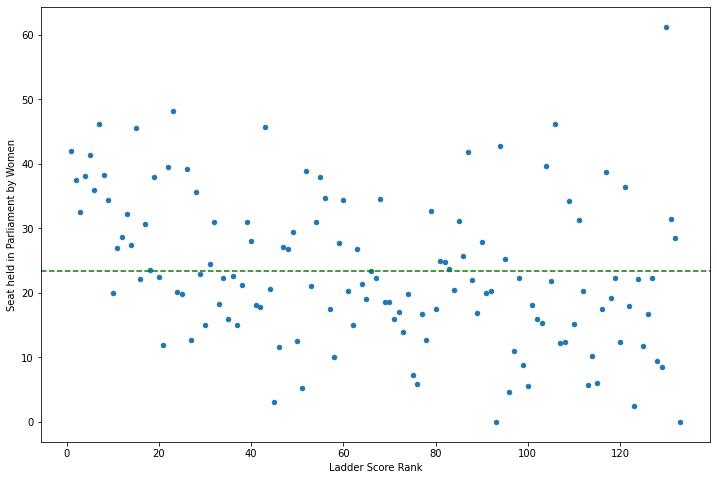

In [160]:
plotSctterChart(df_main,'Ladder Score Rank','Seat held in Parliament by Women')
plt.axes().axhline(df_main['Seat held in Parliament by Women'].mean(), 0, 1,color='green',linestyle='--',label='Model RMSE')